# Mode-based Analysis Notebook

This notebook loads the dataset with inferred transportation modes and provides summaries and visuals to support further analysis and justification.


In [1]:
# Setup
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

# Choose which file to load (expanded features run saves this one)
DATA_PATH = 'dynamic_supply_chain_with_modes_expanded.csv'
if not os.path.exists(DATA_PATH):
    # Fallback to non-expanded if needed
    DATA_PATH = 'dynamic_supply_chain_with_modes.csv'

assert os.path.exists(DATA_PATH), 'No modes CSV found. Run infer_transport_modes.ipynb first.'

df = pd.read_csv(DATA_PATH)
print('Loaded:', DATA_PATH)
print('Rows, Cols:', df.shape)
df.head(3)


Loaded: dynamic_supply_chain_with_modes_expanded.csv
Rows, Cols: (32065, 31)


,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,vehicle_gps_latitude.1,vehicle_gps_longitude.1,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,port_congestion_level,shipping_costs,supplier_reliability_score,lead_time_days,historical_demand,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,delivery_time_deviation,speed_kmh,cluster_id,cluster_id.1,inferred_mode
0,2021-01-01 00:00:00,40.375568,-77.014318,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,0.359066,4.289160,456.503853,0.986064,2.128009,100.772854,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,9.110682,NaN,1,1,Air
1,2021-01-01 01:00:00,33.507818,-117.036902,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,0.230660,7.018373,640.408205,0.463233,12.608166,5313.738114,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,8.175281,3605.981456,0,0,Rail
2,2021-01-01 02:00:00,30.020640,-75.269224,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,0.027210,9.605064,155.749314,0.598561,14.124452,1595.049146,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,1.283594,3941.376571,0,0,Rail


In [2]:
# Basic checks
assert 'inferred_mode' in df.columns, 'inferred_mode column missing.'
print('Mode distribution:')
print(df['inferred_mode'].value_counts())

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('Numeric features:', len(numeric_cols))


Mode distribution:
inferred_mode
Air     23702
Rail     8363
Name: count, dtype: int64
Numeric features: 29


In [3]:
# Stratified descriptive stats by mode
summary_by_mode = df.groupby('inferred_mode')[numeric_cols].agg(['median','mean','std','min','max'])
summary_by_mode


vehicle_gps_latitude                                       vehicle_gps_longitude                                         vehicle_gps_latitude.1                                        \
                            median       mean       std   min        max                median       mean        std         min   max                 median       mean       std   min        max   
inferred_mode                                                                                                                                                                                         
Air                      36.437820  38.038229  6.915005  30.0  50.000000            -86.257984 -90.094792  17.357812 -119.999998 -70.0              36.437820  38.038229  6.915005  30.0  50.000000   
Rail                     36.376256  37.982096  6.926379  30.0  49.999997            -86.450284 -90.178591  17.402495 -119.999991 -70.0              36.376256  37.982096  6.926379  30.0  49.999997   

              vehicle_gps_longitude.1                                         fuel_consumption_rate                                     eta_variation_hours                                     \
                               median       mean        std         min   max                median      mean       std  min        max              median      mean       std       min  max   
inferred_mode                                                                                                                                                                                    
Air                        -86.257984 -90.094792  17.357812 -119.999998 -70.0              5.698975  8.087731  4.312429  5.0  19.999875            3.890920  2.900771  2.273960 -1.999993  5.0   
Rail                       -86.450284 -90.178591  17.402495 -119.999991 -70.0              5.496547  7.796351  4.120104  5.0  19.999041            3.863034  2.871236  2.274276 -1.999992  5.0   

              traffic_congestion_level                                             warehouse_inventory_level                                                   loading_unloading_time            \
                                median      mean       std           min       max                    median        mean         std           min         max                 median      mean   
inferred_mode                                                                                                                                                                                     
Air                           5.027318  5.018104  3.532797  1.091633e-09  9.999999                154.502133  296.243148  322.060901  1.322210e-12  999.988756               1.929612  2.296767   
Rail                          4.865060  4.916073  3.529045  6.842729e-08  9.999984                166.023407  307.790016  327.199135  8.921009e-11  999.999298               1.885542  2.277221   

                                  handling_equipment_availability                                             order_fulfillment_status                                    weather_condition_severity  \
                    std  min  max                          median      mean       std           min       max                   median      mean       std       min  max                     median   
inferred_mode                                                                                                                                                                                          
Air            1.555137  0.5  5.0                        0.160376  0.303319  0.326170  4.565769e-16  0.999999                 0.675322  0.598676  0.345656  0.000001  1.0                   0.498659   
Rail           1.551551  0.5  5.0                        0.157898  0.300928  0.325201  1.898947e-14  0.999987                 0.697040  0.606588  0.345673  0.000003  1.0                   0.490730   

                                                     port_congestion_l

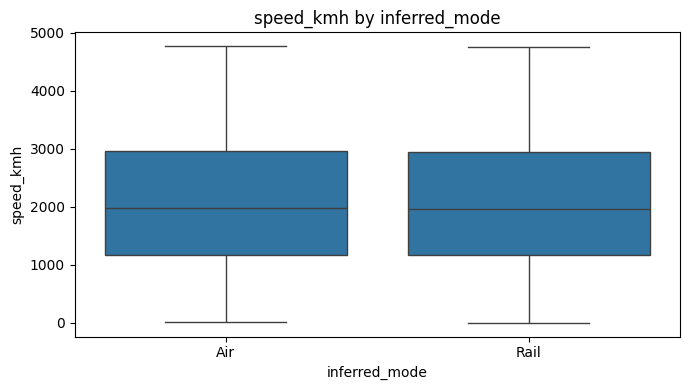

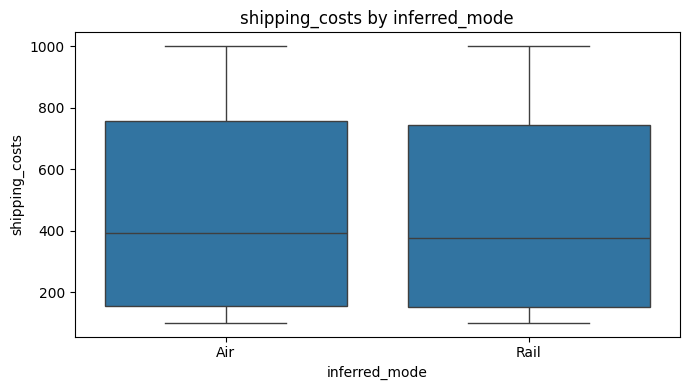

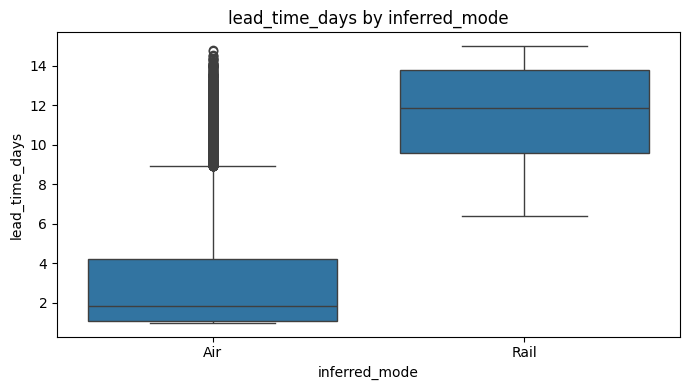

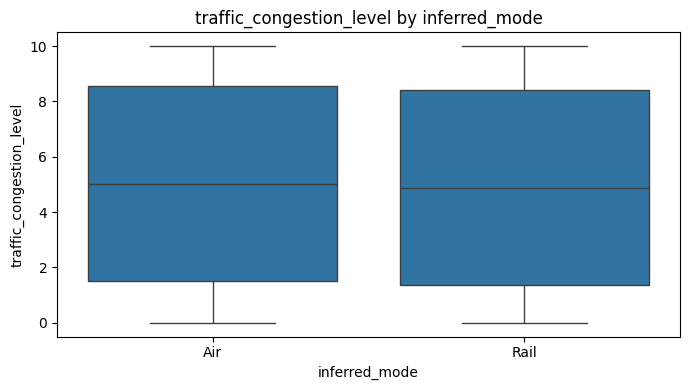

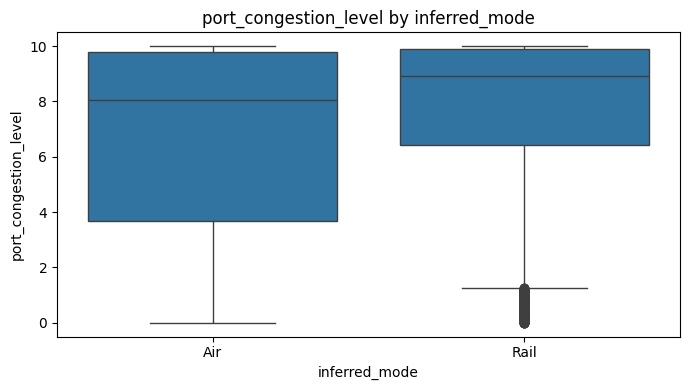

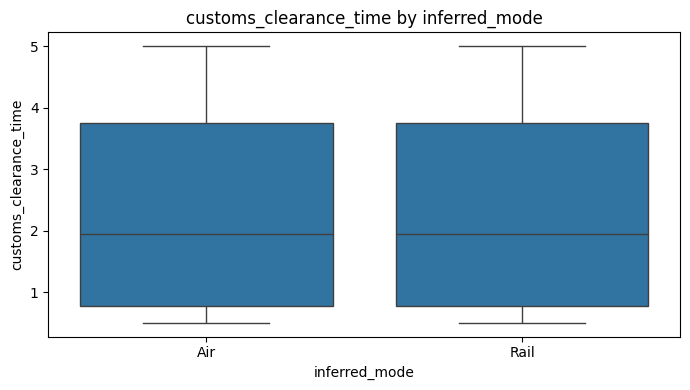

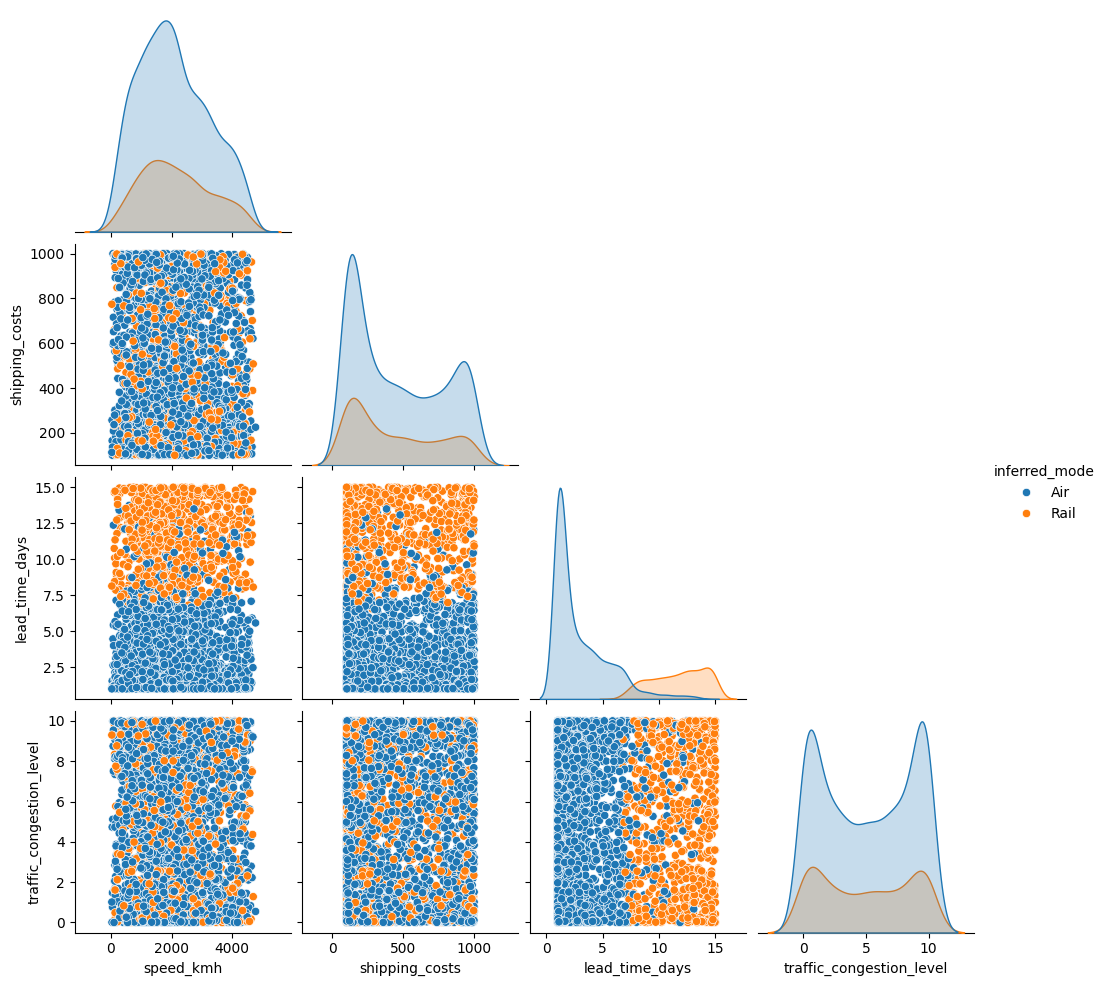

In [4]:
# Visual comparisons
features_to_plot = [
    'speed_kmh', 'shipping_costs', 'lead_time_days',
    'traffic_congestion_level', 'port_congestion_level', 'customs_clearance_time'
]
features_to_plot = [c for c in features_to_plot if c in df.columns]

for col in features_to_plot:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x='inferred_mode', y=col)
    plt.title(f'{col} by inferred_mode')
    plt.tight_layout()
    plt.show()

# Pairwise view for a subset
if len(features_to_plot) >= 3:
    sns.pairplot(df.sample(min(3000, len(df)), random_state=42), vars=features_to_plot[:4], hue='inferred_mode', corner=True)
    plt.show()


In [5]:
# Example: KPI comparison table for judges
kpis = ['delivery_time_deviation', 'delay_probability', 'disruption_likelihood_score']
kpis = [c for c in kpis if c in df.columns]

kpi_table = df.groupby('inferred_mode')[kpis].mean().round(3)
kpi_table


,delivery_time_deviation,delay_probability,disruption_likelihood_score
inferred_mode,,,
Air,5.178,0.699,0.804
Rail,5.177,0.700,0.803
